In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("DataCuaca.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   datetime        4345 non-null   object 
 1   temp            4345 non-null   float64
 2   humidity        4345 non-null   float64
 3   precip          4345 non-null   float64
 4   windgust        4345 non-null   float64
 5   windspeed       4345 non-null   float64
 6   cloudcover      4345 non-null   float64
 7   visibility      4325 non-null   float64
 8   uvindex         4345 non-null   float64
 9   solarradiation  4345 non-null   float64
 10  pressure        4345 non-null   float64
 11  weather         4345 non-null   object 
dtypes: float64(10), object(2)
memory usage: 407.5+ KB


In [ ]:
data.head()

,datetime,temp,humidity,precip,windgust,windspeed,cloudcover,visibility,uvindex,solarradiation,pressure,weather
0,00:00:00,24.9,95.73,0.0,14.8,0.0,44.0,10.0,0.0,0.0,1009.3,cerah
1,01:00:00,24.8,95.42,0.0,15.8,3.6,44.0,10.0,0.0,0.0,1008.4,cerah
2,02:00:00,24.8,95.42,0.0,16.6,0.8,44.0,10.0,0.0,0.0,1008.2,cerah
3,03:00:00,25.0,94.19,0.0,16.9,3.6,27.7,10.0,0.0,0.0,1007.0,cerah
4,04:00:00,24.7,95.73,0.0,18.7,3.6,44.0,10.0,0.0,0.0,1007.3,cerah


In [ ]:
print(data['weather'].value_counts())

weather
berawan    3432
cerah       590
hujan       323
Name: count, dtype: int64


In [ ]:
print(data.isnull().sum())

datetime           0
temp               0
humidity           0
precip             0
windgust           0
windspeed          0
cloudcover         0
visibility        20
uvindex            0
solarradiation     0
pressure           0
weather            0
dtype: int64


In [ ]:
data_bersih = data.dropna()

In [ ]:
print(data_bersih.isnull().sum())

datetime          0
temp              0
humidity          0
precip            0
windgust          0
windspeed         0
cloudcover        0
visibility        0
uvindex           0
solarradiation    0
pressure          0
weather           0
dtype: int64


In [ ]:
print(f"Jumlah data sebelum: {data.shape[0]}")
print(f"Jumlah data sesudah: {data_bersih.shape[0]}")

Jumlah data sebelum: 4345
Jumlah data sesudah: 4325


In [ ]:
# Tampilkan jumlah masing-masing kelas cuaca
print(data_bersih['weather'].value_counts())

weather
berawan    3416
cerah       587
hujan       322
Name: count, dtype: int64


In [ ]:
from scipy import stats
data_numeric = data_bersih.select_dtypes(include=np.number)
z_scores = np.abs(stats.zscore(data_numeric))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
columns_to_plot = data_numeric.columns

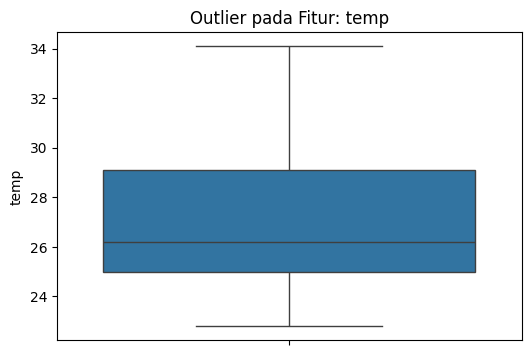

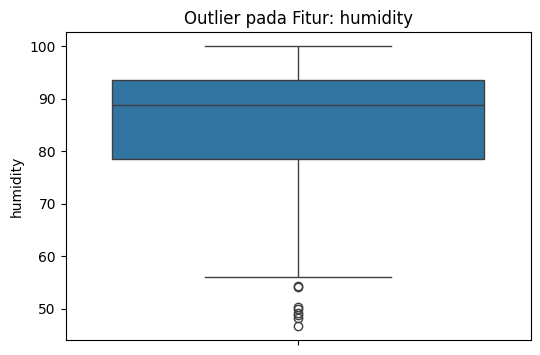

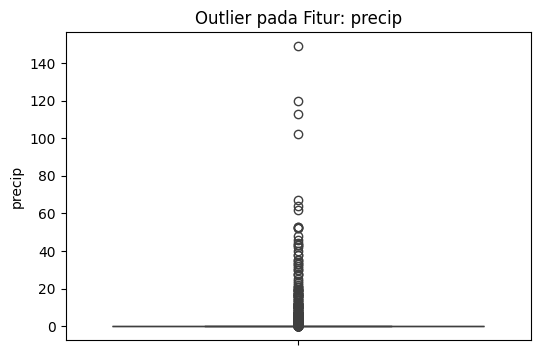

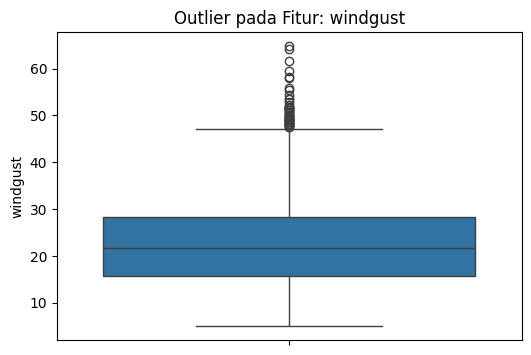

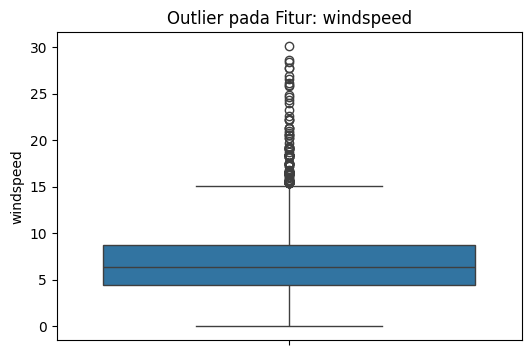

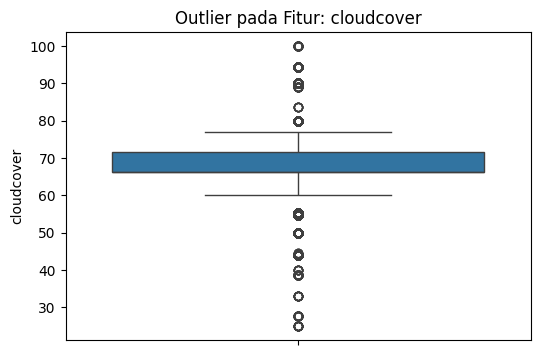

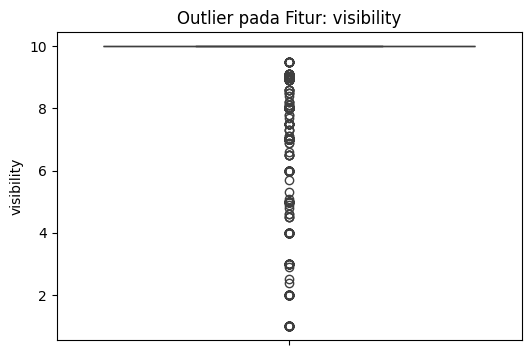

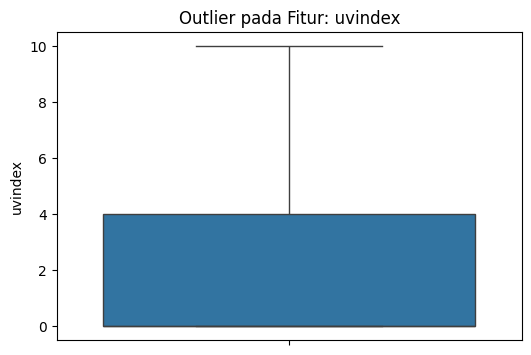

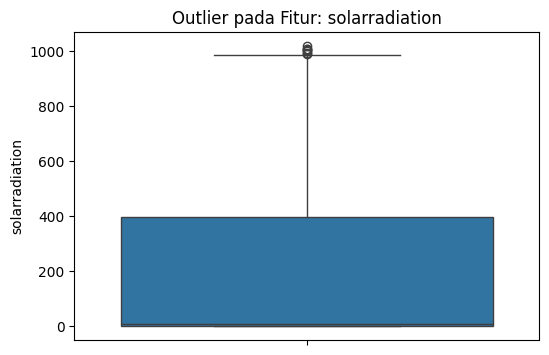

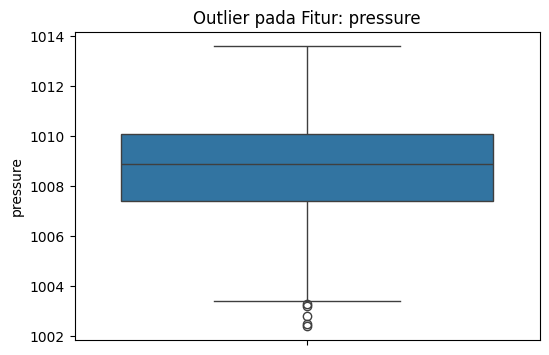

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in columns_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=data_numeric[col])
    plt.title(f"Outlier pada Fitur: {col}")
    plt.show()

In [ ]:
df = data_bersih[(z_scores < threshold).all(axis=1)]
df = df.reset_index(drop=True)

In [ ]:
print(f"Jumlah data sebelum: {data_bersih.shape[0]}")
print(f"Jumlah data sesudah: {df.shape[0]}")

Jumlah data sebelum: 4325
Jumlah data sesudah: 4038


In [ ]:
print(df['weather'].value_counts())

weather
berawan    3258
cerah       524
hujan       256
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['weather'] = le.fit_transform(df['weather'])

In [ ]:
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping LabelEncoder:", mapping)

Mapping LabelEncoder: {'berawan': np.int64(0), 'cerah': np.int64(1), 'hujan': np.int64(2)}


In [ ]:
df.head()

,datetime,temp,humidity,precip,windgust,windspeed,cloudcover,visibility,uvindex,solarradiation,pressure,weather
0,00:00:00,24.9,95.73,0.0,14.8,0.0,44.0,10.0,0.0,0.0,1009.3,1
1,01:00:00,24.8,95.42,0.0,15.8,3.6,44.0,10.0,0.0,0.0,1008.4,1
2,02:00:00,24.8,95.42,0.0,16.6,0.8,44.0,10.0,0.0,0.0,1008.2,1
3,04:00:00,24.7,95.73,0.0,18.7,3.6,44.0,10.0,0.0,0.0,1007.3,1
4,05:00:00,24.6,95.10,0.0,20.9,3.6,44.0,10.0,0.0,0.0,1007.7,1


In [ ]:
train_size = int(len(df) * 0.8)

train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

X_train = train_df.drop(columns=['weather', 'datetime'])
y_train = train_df['weather']

X_test = test_df.drop(columns=['weather', 'datetime'])
y_test = test_df['weather']

In [ ]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

X_train: (3230, 10)
X_test: (808, 10)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_final = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

print("\nX_train_final setelah scaling:\n", X_train_final.head())
print("\nShape X_train_final setelah scaling:", X_train_final.shape)

X_test_final = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)


X_train_final setelah scaling:
        temp  humidity    precip  windgust  windspeed  cloudcover  visibility  \
0 -0.959076  1.097584 -0.140371 -0.842489  -2.189207   -1.807993    0.394069   
1 -0.998282  1.066679 -0.140371 -0.725199  -1.022235   -1.807993    0.394069   
2 -0.998282  1.066679 -0.140371 -0.631368  -1.929880   -1.807993    0.394069   
3 -1.037487  1.097584 -0.140371 -0.385059  -1.022235   -1.807993    0.394069   
4 -1.076693  1.034777 -0.140371 -0.127022  -1.022235   -1.807993    0.394069   

    uvindex  solarradiation  pressure  
0 -0.712872       -0.721391  0.525392  
1 -0.712872       -0.721391  0.003590  
2 -0.712872       -0.721391 -0.112366  
3 -0.712872       -0.721391 -0.634168  
4 -0.712872       -0.721391 -0.402256  

Shape X_train_final setelah scaling: (3230, 10)


In [ ]:
from collections import Counter
print("Distribusi kelas di y_train:", Counter(y_train))
print("Distribusi kelas di y_test:", Counter(y_test))

Distribusi kelas di y_train: Counter({0: 2594, 1: 476, 2: 160})
Distribusi kelas di y_test: Counter({0: 664, 2: 96, 1: 48})


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Distribusi sebelum resampling:", Counter(y_train))

# Step 1: undersample
rus = RandomUnderSampler(sampling_strategy={0: 476, 1: 476, 2: 160}, random_state=42)
X_tmp, y_tmp = rus.fit_resample(X_train_final, y_train)

print("Setelah undersample kelas 0:", Counter(y_tmp))

# Step 2: oversample
smote = SMOTE(sampling_strategy={2: 476}, random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_tmp, y_tmp)

print("Distribusi akhir:", Counter(y_balanced))


Distribusi sebelum resampling: Counter({0: 2594, 1: 476, 2: 160})
Setelah undersample kelas 0: Counter({0: 476, 1: 476, 2: 160})
Distribusi akhir: Counter({0: 476, 1: 476, 2: 476})


Memulai pelatihan model SVM...
Model SVM berhasil dilatih!
Melakukan prediksi pada data pengujian...

--- Hasil Evaluasi Model pada Data Pengujian ---
Akurasi Keseluruhan: 0.9332

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       664
           1       0.74      1.00      0.85        48
           2       0.84      0.76      0.80        96

    accuracy                           0.93       808
   macro avg       0.85      0.90      0.87       808
weighted avg       0.94      0.93      0.93       808



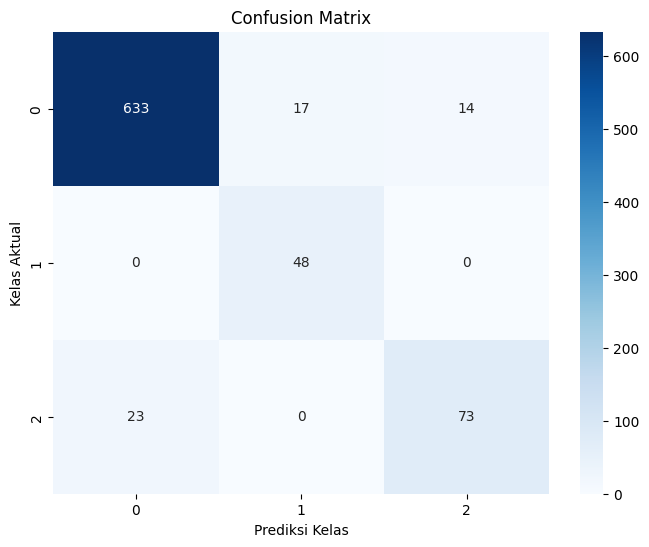

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

svm_model = SVC(kernel='rbf', random_state=42, class_weight='balanced')

# 2. Latih Model
print("Memulai pelatihan model SVM...")
svm_model.fit(X_balanced, y_balanced)
print("Model SVM berhasil dilatih!")

# 3. Lakukan Prediksi pada Data Test
print("Melakukan prediksi pada data pengujian...")
y_pred = svm_model.predict(X_test_final)

# 4. Evaluasi Model
print("\n--- Hasil Evaluasi Model pada Data Pengujian ---")

# Akurasi keseluruhan
print(f"Akurasi Keseluruhan: {accuracy_score(y_test, y_pred):.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))

# Mendapatkan label kelas dari model
class_labels = svm_model.classes_
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi Kelas')
plt.ylabel('Kelas Aktual')
plt.show()
